In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

In [2]:
%matplotlib inline

In [3]:
data_nyc=pd.read_csv('nyc_taxi_trip_duration.csv')

In [4]:
data_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
data_nyc.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
data_nyc.shape

(729322, 11)

In [7]:
data_nyc.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [8]:
data_nyc.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
# Converting the datetime variables[pickup_datetime,dropoff_datetime] to datetime 
data_nyc['pickup_datetime']=pd.to_datetime(data_nyc['pickup_datetime'])
data_nyc['dropoff_datetime']=pd.to_datetime(data_nyc['dropoff_datetime'])

In [10]:
#Identify the interger variable
data_nyc.dtypes[data_nyc.dtypes =='int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [11]:
#Summary of intger datatype
#vendor_id == unique number for each vendor
#trip_duration == trip duration for each trip covered . It is measured by second 
#passenger_count= No of passage count during respective trip.


In [12]:
data_nyc.dtypes[data_nyc.dtypes =='float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [13]:
#Summary of float datatype
#pickup_longitude == pick up location either /measurement east or west --This is ok to be float 
#pickup_latitude ==  pick up location either /measurement north or south --This is ok to be float 
#dropoff_longitude= drop  location either /measurement east or west --This is ok to be float 
#dropoff_latitude= drop  location either /measurement north or south--This is ok to be float 

In [14]:
data_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [15]:
# Converting store_and_fwd_flag to categorical variable 
data_nyc['store_and_fwd_flag']=data_nyc['store_and_fwd_flag'].astype('category')

In [16]:
data_nyc.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [17]:
# Just calculating time taken to complete a particular trip
time_took = data_nyc['dropoff_datetime']-data_nyc['pickup_datetime']
data_nyc['time_taken_trip'] = time_took

In [18]:
data_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_taken_trip
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0 days 00:06:40
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0 days 00:18:20
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0 days 00:27:15
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0 days 00:19:01
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0 days 00:14:08


In [19]:
data_nyc.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag           category
trip_duration                   int64
time_taken_trip       timedelta64[ns]
dtype: object

In [20]:
data_nyc['time_taken_trip']=data_nyc['time_taken_trip']/np.timedelta64(1, 's')

In [21]:
data_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_taken_trip
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,400.0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,1100.0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,1635.0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1141.0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,848.0


In [22]:
data_nyc.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
time_taken_trip              float64
dtype: object

In [23]:
data_nyc['time_taken_trip']=data_nyc['time_taken_trip'].astype(int)

In [24]:
data_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_taken_trip
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,848


In [25]:
data_nyc.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
time_taken_trip                int64
dtype: object

In [26]:
#Now its time to isolate all the numrical countinous variable which will help us to find the min , max and data range
numerical_colum= data_nyc.select_dtypes(include=['int','float']).columns

In [27]:
numerical_colum

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'time_taken_trip'],
      dtype='object')

In [28]:
data_nyc[data_nyc['passenger_count']==data_nyc['passenger_count'].min()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_taken_trip
3572,id3364866,1,2016-02-13 14:04:20,2016-02-13 14:21:29,0,-73.990479,40.742004,-73.989243,40.763680,N,1029,1029
23847,id3485118,1,2016-05-11 19:15:57,2016-05-11 19:32:18,0,-73.987572,40.754566,-73.972031,40.762836,N,981,981
45987,id2571672,1,2016-03-06 05:24:55,2016-03-06 05:25:00,0,-73.979698,40.761196,-73.979698,40.761196,Y,5,5
76998,id1253169,1,2016-02-28 01:08:48,2016-02-28 01:09:01,0,-74.035942,40.736488,-74.035942,40.736492,N,13,13
101709,id1220914,2,2016-01-17 20:51:55,2016-01-17 20:52:43,0,-73.959999,40.766861,-73.960106,40.766911,N,48,48
186050,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4,4
186913,id3494250,1,2016-04-02 02:32:10,2016-04-02 02:50:51,0,-74.005089,40.729038,-74.032486,40.619579,N,1121,1121
194926,id1205792,1,2016-03-11 12:33:17,2016-03-11 13:09:48,0,-73.982063,40.763798,-74.188072,40.694042,N,2191,2191
231010,id0959777,2,2016-03-01 19:11:26,2016-03-01 19:11:30,0,-74.003777,40.738186,-74.003807,40.738174,N,4,4
247692,id2891366,1,2016-02-18 21:26:15,2016-02-18 21:28:00,0,-73.983543,40.716404,-73.983543,40.716404,N,105,105


In [29]:
data_nyc[data_nyc['passenger_count']==data_nyc['passenger_count'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_taken_trip
629474,id2489742,2,2016-06-24 08:09:21,2016-06-24 08:18:41,9,-73.710632,40.671581,-73.710632,40.671581,N,560,560


In [30]:
data_nyc[data_nyc['trip_duration']==data_nyc['trip_duration'].min()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_taken_trip
70318,id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1,1
95823,id2943073,2,2016-01-03 16:55:44,2016-01-03 16:55:45,1,-73.975677,40.785488,-73.976372,40.785831,N,1,1
102646,id2536510,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.940384,40.786423,-73.940300,40.786373,N,1,1
119181,id2517984,1,2016-01-09 00:28:55,2016-01-09 00:28:56,1,-73.861961,40.768559,-73.861961,40.768559,N,1,1
296874,id1520236,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.819893,40.740822,-73.819885,40.740822,N,1,1
312992,id0075470,1,2016-03-07 16:12:28,2016-03-07 16:12:29,1,-73.980690,40.744419,-73.980690,40.744419,N,1,1
323299,id0578509,1,2016-02-03 12:35:22,2016-02-03 12:35:23,1,-73.980560,40.754829,-73.980560,40.754829,N,1,1
398887,id2402793,1,2016-04-30 00:28:45,2016-04-30 00:28:46,1,-73.789658,40.647003,-73.789658,40.647003,N,1,1
512833,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,N,1,1
533760,id0948644,2,2016-02-22 00:40:25,2016-02-22 00:40:26,0,-73.987595,40.719997,-73.987595,40.720005,N,1,1


In [31]:
data_nyc[data_nyc['trip_duration']==data_nyc['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_taken_trip
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,1939736,1939736


In [32]:
data_nyc[data_nyc['pickup_longitude']==data_nyc['pickup_longitude'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_taken_trip
423573,id0205460,1,2016-01-10 16:46:16,2016-01-10 16:51:45,1,-65.897385,39.457882,-65.897385,39.457882,N,329,329


In [33]:
data_nyc[data_nyc['pickup_latitude']==data_nyc['pickup_latitude'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_taken_trip
244913,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792,792


In [34]:
data_nyc[numerical_colum].min()

vendor_id              1.000000
passenger_count        0.000000
pickup_longitude    -121.933342
pickup_latitude       34.712234
dropoff_longitude   -121.933304
dropoff_latitude      32.181141
trip_duration          1.000000
time_taken_trip        1.000000
dtype: float64

In [35]:
data_nyc[numerical_colum].max()

vendor_id            2.000000e+00
passenger_count      9.000000e+00
pickup_longitude    -6.589738e+01
pickup_latitude      5.188108e+01
dropoff_longitude   -6.589738e+01
dropoff_latitude     4.392103e+01
trip_duration        1.939736e+06
time_taken_trip      1.939736e+06
dtype: float64

1. Minimum trip durations is 0 second 
2. Maximum trip duration is 1939736 second
3. Minimum passager count is 0 
4. Maximum passager count is 9
5. Minimum pickup_longitude is -121.933342
6. Maximum pickup_longitude is  -65.897385
7. Minimum pickup_latitude is  34.712234
8. Maximum pickup_latitude is  51.881084



We also observed that there are only two vendor id which means two vendors are providing the taxi to NYC
We also obseved that there are no deviation of secords between actual variable (trip_duration) vs derived variable(time_taken_trip).Hence concluded to drop time_taken_trip and deviation columns 

In [36]:
# Now checking if amy null/missing value present in numerical columms 
data_nyc.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
time_taken_trip       0
dtype: int64

In [37]:
data_nyc.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
time_taken_trip       0
dtype: int64

In [38]:
data_nyc.shape

(729322, 12)

Hence we obersved that no missing values in all the columns .

In [39]:
# checking the summary( various descriptive statistics ) of all the numerical columms 
data_nyc.describe(include=[int,float])

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,time_taken_trip
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,1.939736e+06


In [40]:
# checking the avarage travel duration of each trip as well as avarage passanger count of each time 
data_nyc.trip_duration.mean()

952.2291333594764

In [41]:
data_nyc.passenger_count.mean()

1.6620546205928246

In [42]:
# Droping the colmns that was created earlier to validate the trip_duration variable values .
data_nyc=data_nyc.drop(['time_taken_trip'],axis=1)

In [43]:
data_nyc.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [44]:
data_nyc[['pickup_datetime','dropoff_datetime']]


,pickup_datetime,dropoff_datetime
0,2016-02-29 16:40:21,2016-02-29 16:47:01
1,2016-03-11 23:35:37,2016-03-11 23:53:57
2,2016-02-21 17:59:33,2016-02-21 18:26:48
3,2016-01-05 09:44:31,2016-01-05 10:03:32
4,2016-02-17 06:42:23,2016-02-17 06:56:31
...,...,...
729317,2016-05-21 13:29:38,2016-05-21 13:34:34
729318,2016-02-22 00:43:11,2016-02-22 00:48:26
729319,2016-04-15 18:56:48,2016-04-15 19:08:01
729320,2016-06-19 09:50:47,2016-06-19 09:58:14


Extracting new colums from pickup_datetime and pickup_datetime

checking the extracted colum from dates field

In [45]:
data_nyc['pickup_datetime'] = pd.to_datetime(data_nyc['pickup_datetime'])
data_nyc['dropoff_datetime'] = pd.to_datetime(data_nyc['dropoff_datetime'])

In [46]:
data_nyc['pickup_datetime_dayOfWeek'] = data_nyc['pickup_datetime'].dt.day_name()
data_nyc['pickup_datetime_month'] = data_nyc['pickup_datetime'].dt.month_name()
data_nyc['pickup_datetime_week'] = data_nyc['pickup_datetime'].dt.isocalendar().week
data_nyc['pickup_datetime_year'] = data_nyc['pickup_datetime'].dt.year
data_nyc['pickup_datetime_hour'] = data_nyc['pickup_datetime'].dt.hour
data_nyc['dropoff_datetime_dayOfWeek'] = data_nyc['dropoff_datetime'].dt.day_name()
data_nyc['dropoff_datetime_month'] = data_nyc['dropoff_datetime'].dt.month_name()
data_nyc['dropoff_datetime_week'] = data_nyc['dropoff_datetime'].dt.isocalendar().week
data_nyc['dropoff_datetimeyear'] = data_nyc['dropoff_datetime'].dt.year
data_nyc['dropoff_datetime_hour'] = data_nyc['dropoff_datetime'].dt.hour

In [47]:
data_nyc[['pickup_datetime','pickup_datetime_dayOfWeek','pickup_datetime_month','pickup_datetime_week','pickup_datetime_year','pickup_datetime_hour']].head()

,pickup_datetime,pickup_datetime_dayOfWeek,pickup_datetime_month,pickup_datetime_week,pickup_datetime_year,pickup_datetime_hour
0,2016-02-29 16:40:21,Monday,February,9,2016,16
1,2016-03-11 23:35:37,Friday,March,10,2016,23
2,2016-02-21 17:59:33,Sunday,February,7,2016,17
3,2016-01-05 09:44:31,Tuesday,January,1,2016,9
4,2016-02-17 06:42:23,Wednesday,February,7,2016,6


In [48]:
data_nyc[['dropoff_datetime','dropoff_datetime_dayOfWeek','dropoff_datetime_month','dropoff_datetimeyear','dropoff_datetime_week','dropoff_datetime_hour']].head()

,dropoff_datetime,dropoff_datetime_dayOfWeek,dropoff_datetime_month,dropoff_datetimeyear,dropoff_datetime_week,dropoff_datetime_hour
0,2016-02-29 16:47:01,Monday,February,2016,9,16
1,2016-03-11 23:53:57,Friday,March,2016,10,23
2,2016-02-21 18:26:48,Sunday,February,2016,7,18
3,2016-01-05 10:03:32,Tuesday,January,2016,1,10
4,2016-02-17 06:56:31,Wednesday,February,2016,7,6


/Users/728389/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

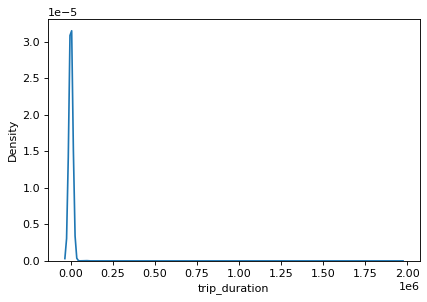

In [49]:
#KDE plot for trip druration
plt.figure(dpi=80)
sns.kdeplot(data_nyc['trip_duration'],bw=3)

Trip duration clear shows that it has right skewd, so lets find out the outliears 

/Users/728389/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

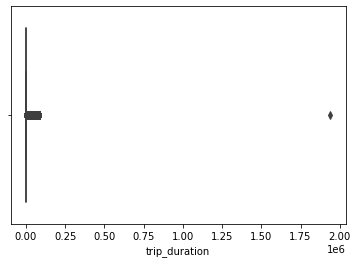

In [50]:
sns.boxplot(data_nyc['trip_duration'], orient='horizontal')

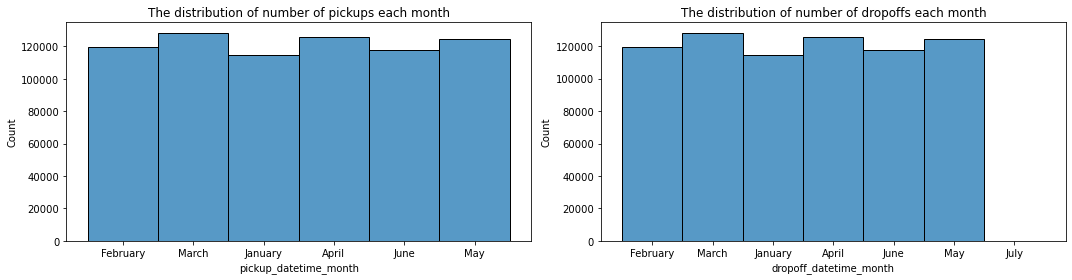

In [51]:
#Creting barplot to observed the drop off and pick up months based on the drop offand pick ups time .
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
bins = [0,25,50,75,100]
sns.histplot(x='pickup_datetime_month',data=data_nyc,ax=ax[0],bins=[0,25,50,75,100])
ax[0].set_title('The distribution of number of pickups each month')
sns.histplot(x='dropoff_datetime_month',data=data_nyc,ax=ax[1],bins=[0,25,50,75,100])
ax[1].set_title('The distribution of number of dropoffs each month')
plt.tight_layout()

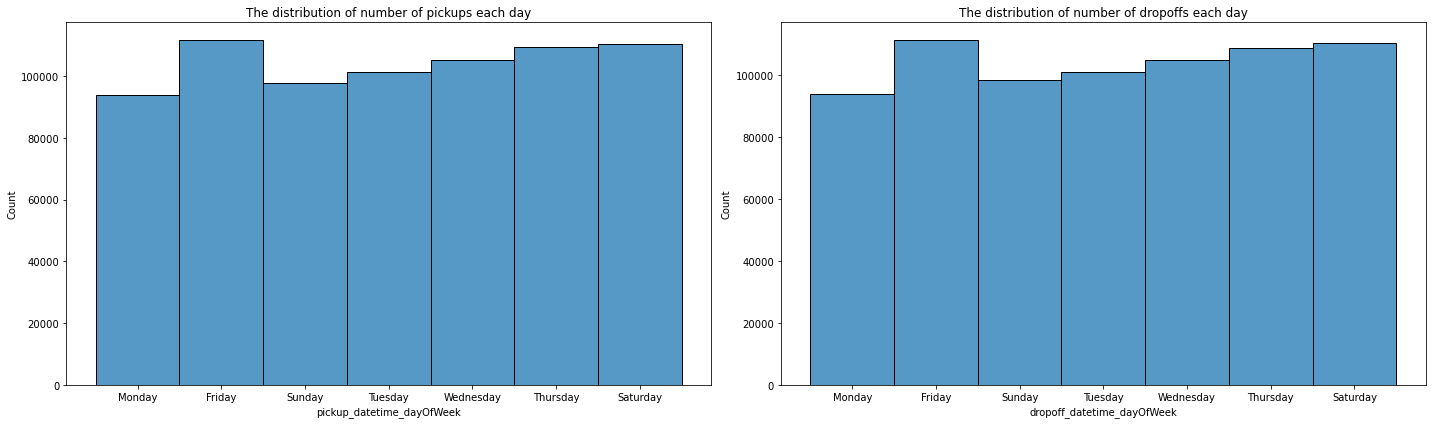

In [52]:
#Creting histogram to observed the drop off dayOfWeek and pick up dayOfWeek 
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
bins = [0,25,50,75,100]
sns.histplot(x='pickup_datetime_dayOfWeek',data=data_nyc,ax=ax[0],bins=[0,25,50,75,100])
ax[0].set_title('The distribution of number of pickups each day')
sns.histplot(x='dropoff_datetime_dayOfWeek',data=data_nyc,ax=ax[1],bins=[0,25,50,75,100])
ax[1].set_title('The distribution of number of dropoffs each day')
plt.tight_layout()

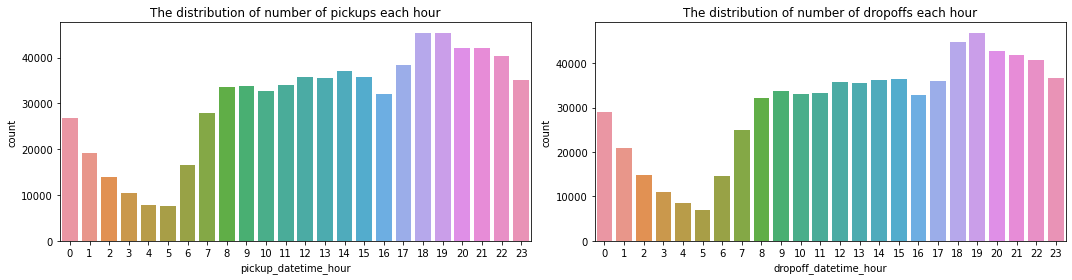

In [53]:
#Creting histogram to observed the drop off hour and pick up hour 
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
sns.countplot(x='pickup_datetime_hour',data=data_nyc,ax=ax[0])
ax[0].set_title('The distribution of number of pickups each hour')
sns.countplot(x='dropoff_datetime_hour',data=data_nyc,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs each hour')
plt.tight_layout()

observation :
 - there are nothing much difference in pick up and drop off time . 
 - Pick up and drop off hours are at their pick on 18th & 19th hours of a day which means 6 PM and 7 PM 
 - Pick up and drop off hrs is lesser duing 4th and 5th hours of day which means less booking is happening at 4 and 5 AM monring.
 -  Most of the trip is happening on Friday .

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

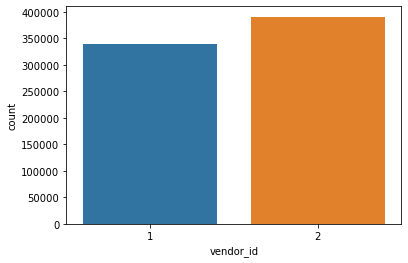

In [54]:
#Distibution of vendor_id
sns.countplot(data=data_nyc,x='vendor_id')

<AxesSubplot:xlabel='vendor_id', ylabel='pickup_datetime_hour'>

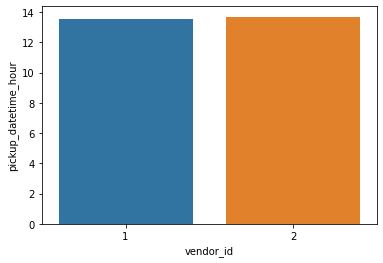

In [55]:
# Now check which vendor has done more trip(pick up)
fig = plt.figure(figsize = (6,4))
sns.barplot(data=data_nyc,x='vendor_id',y='pickup_datetime_hour')

<AxesSubplot:xlabel='vendor_id', ylabel='dropoff_datetime_hour'>

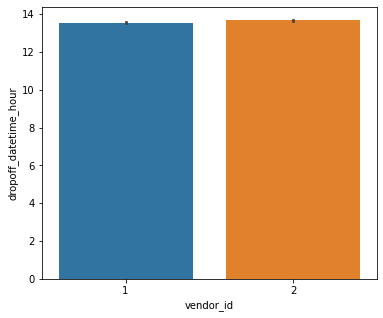

In [56]:
# Now check which vendor has done more trip(drop off)
fig = plt.figure(figsize = (6, 5))
sns.barplot(data=data_nyc,x='vendor_id',y='dropoff_datetime_hour')

obsv:
    - there are nothing much differnce between two vendor

Now lets understand the longitute and latitue of NYC city 
As per my reserch from internet , the 
New York City, NY, USA Lat Long Coordinates Info
The latitude of New York City, NY, USA is 40.730610, and the longitude is -73.935242. New York City, NY, USA is located at United States country in the Cities place category with the gps coordinates of 40° 43' 50.1960'' N and 73° 56' 6.8712'' W.
Latitude: 40.730610
Longitude: -73.935242
    
lets us 1st try to limit the travel into NewYork city     

In [57]:
print('min_pickup_longitude', data_nyc['pickup_longitude'].min())
print('max_pickup_longitude', data_nyc['pickup_longitude'].max())
print('min_pickup_latitude', data_nyc['pickup_latitude'].min())
print('max_pickup_latitude', data_nyc['pickup_latitude'].max())
print('min_dropoff_longitude', data_nyc['dropoff_longitude'].min())
print('max_dropoff_longitude', data_nyc['dropoff_longitude'].max())
print('min_dropoff_latitude', data_nyc['dropoff_latitude'].min())
print('max_dropoff_latitude', data_nyc['dropoff_latitude'].max())

min_pickup_longitude -121.93334197998048
max_pickup_longitude -65.89738464355469
min_pickup_latitude 34.71223449707032
max_pickup_latitude 51.88108444213867
min_dropoff_longitude -121.9333038330078
max_dropoff_longitude -65.89738464355469
min_dropoff_latitude 32.181140899658196
max_dropoff_latitude 43.92102813720703


In [58]:
#consolidate all the ditance colum 
distance_cols = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']

In [63]:
# Logic to get the distance 
from math import radians, sin, cos, sqrt, asin
def coordinates(columns):
    
    lati1, longi1, lati2, longi2 = columns 
    R = 6372.8 # Earth radius in kilometers
    
    dLati = radians(lati2 - lati1)
    dLongi = radians(longi2 - longi1)
    lati1 = radians(lati1)
    lati2 = radians(lati2)
    
    a = sin(dLati/2)**2 + cos(lati1)*cos(lati2)*sin(dLongi/2)**2
    c = 2*asin(sqrt(a))
    
    return R * c

distances = data_nyc[distance_cols].apply(lambda x: coordinates(x),axis = 1)
data_nyc['distance_km'] = distances.copy()


<AxesSubplot:xlabel='distance_km', ylabel='trip_duration'>

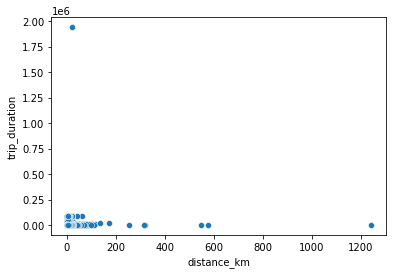

In [60]:
sns.scatterplot(x='distance_km',y='trip_duration',data=data_nyc)

In [61]:

data_nyc['distance_km'].min()


0.0

In [62]:
#Minimum distance does not help us as it is same as no drive or cancelation of trip
# so lets remove all the distance =0
data_nyc = data_nyc[data_nyc['distance_km'] > 0]



<AxesSubplot:xlabel='distance_km', ylabel='trip_duration'>

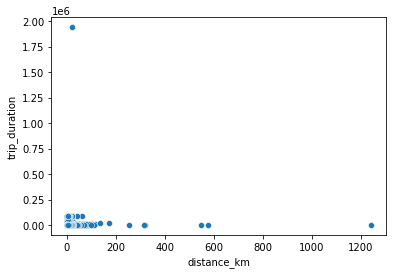

In [63]:
sns.scatterplot(x='distance_km',y='trip_duration',data=data_nyc)

Looks like some outliers in trip duration and distance . This might be travel happened beyond NYCITY.
Lets keep the trip with in the NY longtiute and latitute .

In [122]:
data_nyc = data_nyc[data_nyc['pickup_longitude'] <= --73.93]
data_nyc = data_nyc[data_nyc['pickup_longitude'] >= -74.00]
data_nyc = data_nyc[data_nyc['pickup_latitude'] <= 40.73]
data_nyc = data_nyc[data_nyc['pickup_latitude'] >= 40.63]
data_nyc = data_nyc[data_nyc['dropoff_longitude'] <= -73.93]
data_nyc = data_nyc[data_nyc['dropoff_longitude'] >= -74.00]
data_nyc = data_nyc[data_nyc['dropoff_latitude'] <= 40.73]
data_nyc = data_nyc[data_nyc['dropoff_latitude'] >= 40.63]

In [123]:
# now calculate the distance again 
# Logic to get the distance 
from math import radians, sin, cos, sqrt, asin
def coordinates(columns):
    
    lati1, longi1, lati2, longi2 = columns 
    R = 6372.8 # Earth radius in kilometers
    
    dLati = radians(lati2 - lati1)
    dLongi = radians(longi2 - longi1)
    lati1 = radians(lati1)
    lati2 = radians(lati2)
    
    a = sin(dLati/2)**2 + cos(lati1)*cos(lati2)*sin(dLongi/2)**2
    c = 2*asin(sqrt(a))
    
    return R * c

distances = data_nyc[distance_cols].apply(lambda x: coordinates(x),axis = 1)
data_nyc['distance_km'] = distances.copy()


<AxesSubplot:xlabel='distance_km', ylabel='trip_duration'>

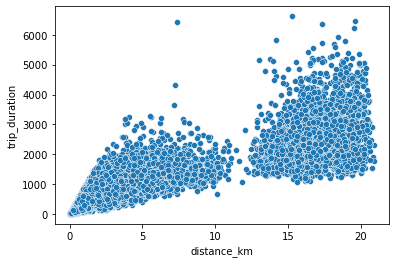

In [124]:
sns.scatterplot(x='distance_km',y='trip_duration',data=data_nyc)

In [125]:
#We can observed a lot of trip druation is beyond 2hours seconds
# lets omit them
data_nyc=data_nyc[data_nyc['trip_duration']<=7200]

<AxesSubplot:xlabel='distance_km', ylabel='trip_duration'>

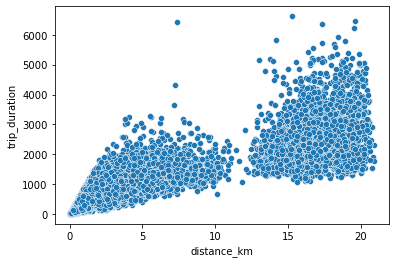

In [126]:
sns.scatterplot(x='distance_km',y='trip_duration',data=data_nyc)

In [127]:
# Lets calulate the speed in Km/hr
data_nyc['speed_km/h']= 3600*(data_nyc.distance_km/data_nyc.trip_duration)  

In [128]:
data_nyc['speed_km/h'].head()

42    11.686523
65     9.537680
68    16.985047
97    12.209709
99    15.446283
Name: speed_km/h, dtype: float64

<AxesSubplot:xlabel='distance_km', ylabel='speed_km/h'>

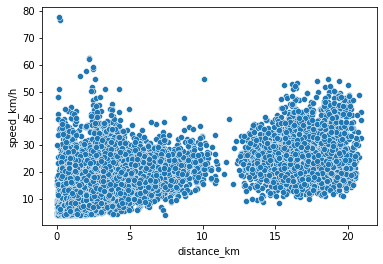

In [129]:
sns.scatterplot(x='distance_km',y='speed_km/h',data=data_nyc)

In [130]:
#As per US standard lets keep US speed limit to 80 km/h as well as 1 km/h drive doens not make sense 
data_nyc=data_nyc[data_nyc['speed_km/h'] >0]
data_nyc=data_nyc[data_nyc['speed_km/h'] <=100]


<AxesSubplot:xlabel='distance_km', ylabel='speed_km/h'>

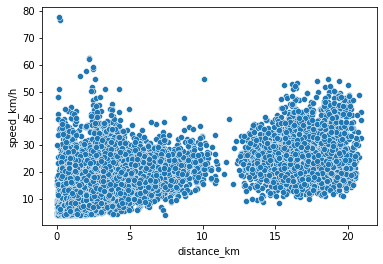

In [131]:
sns.scatterplot(x='distance_km',y='speed_km/h',data=data_nyc)

Text(0.5, 1.0, 'Trip Distribution')

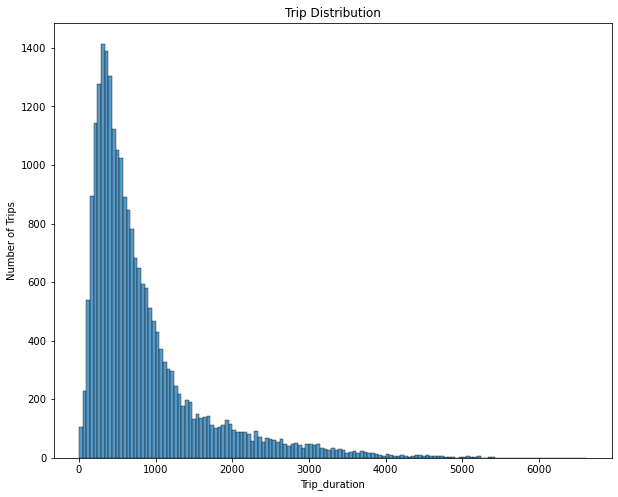

In [132]:
plt.figure(figsize=(10,8))
sns.histplot(data_nyc.trip_duration)
plt.xlabel('Trip_duration')
plt.ylabel('Number of Trips')
plt.title('Trip Distribution')



Text(0.5, 1.0, 'Trip Distribution')

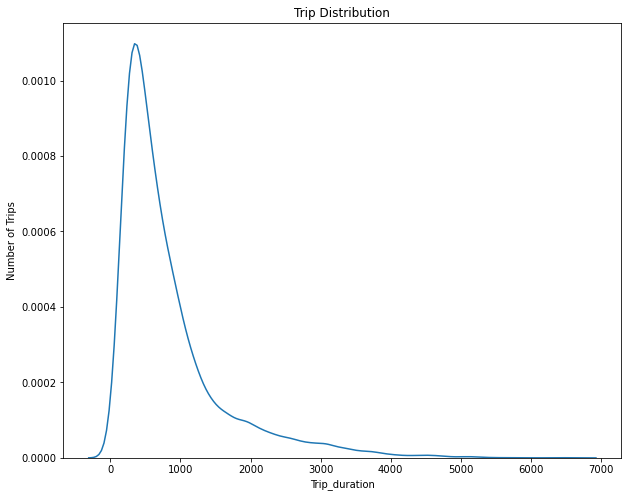

In [133]:
plt.figure(figsize=(10,8))
sns.kdeplot(data_nyc.trip_duration)
plt.xlabel('Trip_duration')
plt.ylabel('Number of Trips')
plt.title('Trip Distribution')


This distibution has right skewed , So apply log transfomartion to make it normal 

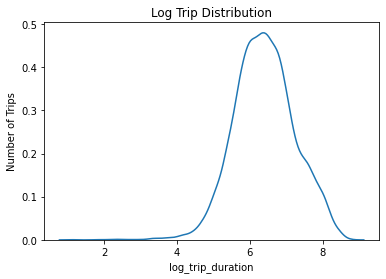

/Users/728389/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_trip_duration', ylabel='Density'>

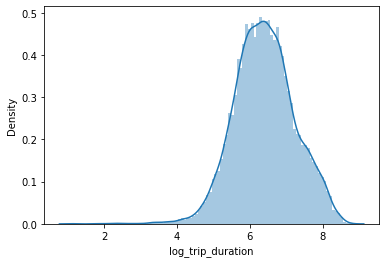

In [134]:
# Now lets normalize the data
data_nyc['log_trip_duration']= np.log1p(data_nyc['trip_duration'])
sns.kdeplot(data_nyc['log_trip_duration'].values)
plt.title('Log Trip Distribution')
plt.xlabel('log_trip_duration')
plt.ylabel('Number of Trips')
plt.show()
sns.distplot(data_nyc["log_trip_duration"], bins =100)

<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='count'>

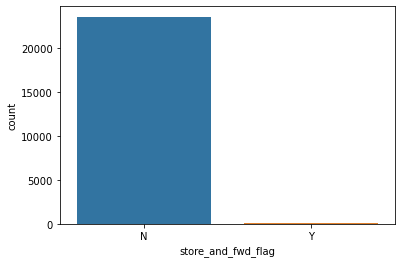

In [140]:
# find out the trips which details are not records vs trips which details are records 
sns.countplot(data=data_nyc,x='store_and_fwd_flag')

Here looks like store_and_fwd_flag= Y is very mininal and can be negligible.